<a href="https://colab.research.google.com/github/rushi-k12/API/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-4-7ca7f5bd7fbb>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.964531e+07,1.964531e+07,False,NaN,1,None,None,None,2024-03-05T13:20:00.000Z,67956.950413,7.701107e+10,75.7770,1.388506,3.973270,18.809600,58.037643,54.264209,54.413682,1.335035e+12,52.5955,1.427096e+12,None,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853
1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201271e+08,1.201271e+08,True,NaN,2,None,None,None,2024-03-05T13:20:00.000Z,3768.714756,3.303281e+10,85.3292,0.390120,7.193775,14.954398,63.554890,67.299760,66.615403,4.527249e+11,17.8177,4.527249e+11,None,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853
2,825,Tether USDt,USDT,tether,76969,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.000447e+11,1.038001e+11,True,NaN,3,None,None,None,2024-03-05T13:19:00.000Z,1.000643,1.403347e+11,60.3953,0.009486,0.017508,0.015974,0.087175,-0.031595,0.054566,1.001091e+11,3.9400,1.038669e+11,None,2024-03-05T13:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-05 13:21:44.396853
3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495414e+08,1.495414e+08,False,NaN,4,None,None,None,2024-03-05T13:19:00.000Z,421.753299,2.518645e+09,41.5655,0.377673,0.634955,5.585101,40.555230,32.263974,82.936189,6.306956e+10,2.4847,6.306956e+10,None,2024-03-05T13:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853
4,5426,Solana,SOL,solana,633,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.423152e+08,5.710413e+08,True,NaN,5,None,None,None,2024-03-05T13:20:00.000Z,132.417872,4.714201e+09,46.2627,0.465191,-0.452332,19.935378,35.376731,30.729048,109.233935,5.857044e+10,2.3075,7.561607e+10,None,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853


In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


# Define the file path
    csv_file_path = '/content/API.csv'

# Use this if you want to create a CSV and append data to it
# Make sure to uncomment the necessary lines

# df = pd.json_normalize(data['data'])
# df['timestamp'] = pd.to_datetime('now')

# Check if the CSV file exists
    if not os.path.isfile(csv_file_path):
    # If it doesn't exist, create the file with headers
        df.to_csv(csv_file_path, header='column_names')
    else:
    # If it exists, append data to the file without writing headers
        df.to_csv(csv_file_path, mode='a', header=False)

# Then to read in the file:
# df = pd.read_csv(csv_file_path)



In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

<ipython-input-5-b8f140c2b571>:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-5-b8f140c2b571>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-5-b8f140c2b571>:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-5-b8f140c2b571>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


<ipython-input-5-b8f140c2b571>:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
<ipython-input-5-b8f140c2b571>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [7]:
df_ = pd.read_csv("/content/API.csv")
df_

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.964531e+07,1.964531e+07,False,NaN,1,NaN,NaN,NaN,2024-03-05T13:20:00.000Z,67956.950413,7.701107e+10,75.7770,1.388506,3.973270,18.809600,58.037643,54.264209,54.413682,1.335035e+12,52.5955,1.427096e+12,NaN,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853,NaN
1,1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201271e+08,1.201271e+08,True,NaN,2,NaN,NaN,NaN,2024-03-05T13:20:00.000Z,3768.714756,3.303281e+10,85.3292,0.390120,7.193775,14.954398,63.554890,67.299760,66.615403,4.527249e+11,17.8177,4.527249e+11,NaN,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853,NaN
2,2,825,Tether USDt,USDT,tether,76969,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.000447e+11,1.038001e+11,True,NaN,3,NaN,NaN,NaN,2024-03-05T13:19:00.000Z,1.000643,1.403347e+11,60.3953,0.009486,0.017508,0.015974,0.087175,-0.031595,0.054566,1.001091e+11,3.9400,1.038669e+11,NaN,2024-03-05T13:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-05 13:21:44.396853,NaN
3,3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495414e+08,1.495414e+08,False,NaN,4,NaN,NaN,NaN,2024-03-05T13:19:00.000Z,421.753299,2.518645e+09,41.5655,0.377673,0.634955,5.585101,40.555230,32.263974,82.936189,6.306956e+10,2.4847,6.306956e+10,NaN,2024-03-05T13:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853,NaN
4,4,5426,Solana,SOL,solana,633,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.423152e+08,5.710413e+08,True,NaN,5,NaN,NaN,NaN,2024-03-05T13:20:00.000Z,132.417872,4.714201e+09,46.2627,0.465191,-0.452332,19.935378,35.376731,30.729048,109.233935,5.857044e+10,2.3075,7.561607e+10,NaN,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853,NaN
5,0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.964531e+07,1.964531e+07,False,NaN,1,NaN,NaN,NaN,2024-03-05T13:21:00.000Z,67930.100799,7.704450e+10,75.8603,1.330592,3.934936,18.817668,57.985353,54.235199,54.434972,1.334508e+12,52.5747,1.426532e+12,NaN,2024-03-05T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:53.593471
6,1,1027,Ethereum,ETH,ethereum,8499,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201271e+08,1.201271e+08,True,NaN,2,NaN,NaN,NaN,2024-03-05T13:21:00.000Z,3772.060448,3.303909e+10,85.3861,0.253641,7.332576,15.091034,63.705704,67.468851,66.803294,4.531268e+11,17.8335,4.531268e+11,NaN,2024-03-05T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:53.593471
7,2,825,Tether USDt,USDT,tether,76969,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,1.000447e+11,1.038001e+11,True,NaN,3,NaN,NaN,NaN,2024-03-05T13:20:00.000Z,1.000694,1.404808e+11,60.4666,0.028069,0.024961,0.029243,0.099971,-0.031914,0.058001,1.001141e+11,3.9401,1.038721e+11,NaN,2024-03-05T13:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,NaN,2024-03-05 13:21:53.593471
8,3,1839,BNB,BNB,bnb,2082,2017-07-25T00:00:00.000Z,"['mark

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [13]:
df.head(1)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10849,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19645312.00,19645312.00,False,NaN,1,NaN,NaN,None,2024-03-05T13:20:00.000Z,67956.95,77011070386.29,75.78,1.39,3.97,18.81,58.04,54.26,54.41,1335035493439.76,52.60,1427095958681.39,None,2024-03-05T13:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-05 13:21:44.396853,NaT


In [17]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.43,4.03,19.00,58.07,54.29,54.46
Ethereum,0.35,7.37,15.21,63.76,67.52,66.83
Tether USDt,0.02,0.03,0.01,0.09,-0.02,0.06
BNB,0.36,0.61,5.55,40.54,32.23,82.89
Solana,0.36,-0.47,19.95,35.42,30.74,109.45
XRP,0.29,-0.40,17.01,27.54,14.21,4.62
USDC,0.00,0.02,-0.00,-0.01,-0.01,0.00
Cardano,0.65,-0.45,24.79,53.40,42.84,74.23
Dogecoin,2.84,15.75,97.90,139.01,128.38,84.66


In [18]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      1.43
             quote.USD.percent_change_24h     4.03
             quote.USD.percent_change_7d     19.00
             quote.USD.percent_change_30d    58.07
             quote.USD.percent_change_60d    54.29
             quote.USD.percent_change_90d    54.46
Ethereum     quote.USD.percent_change_1h      0.35
             quote.USD.percent_change_24h     7.37
             quote.USD.percent_change_7d     15.21
             quote.USD.percent_change_30d    63.76
             quote.USD.percent_change_60d    67.52
             quote.USD.percent_change_90d    66.83
Tether USDt  quote.USD.percent_change_1h      0.02
             quote.USD.percent_change_24h     0.03
             quote.USD.percent_change_7d      0.01
             quote.USD.percent_change_30d     0.09
             quote.USD.percent_change_60d    -0.02
             quote.USD.percent_change_90d     0.06
BNB          quote.USD.percent_change_1h

In [19]:
type(df3)

pandas.core.frame.DataFrame

In [20]:
type(df4)

pandas.core.series.Series

In [22]:
df5 = df4.to_frame(name = 'values')

In [23]:
df5

values
name                                            
Bitcoin     quote.USD.percent_change_1h     1.43
            quote.USD.percent_change_24h    4.03
            quote.USD.percent_change_7d    19.00
            quote.USD.percent_change_30d   58.07
            quote.USD.percent_change_60d   54.29
            quote.USD.percent_change_90d   54.46
Ethereum    quote.USD.percent_change_1h     0.35
            quote.USD.percent_change_24h    7.37
            quote.USD.percent_change_7d    15.21
            quote.USD.percent_change_30d   63.76
            quote.USD.percent_change_60d   67.52
            quote.USD.percent_change_90d   66.83
Tether USDt quote.USD.percent_change_1h     0.02
            quote.USD.percent_change_24h    0.03
            quote.USD.percent_change_7d     0.01
            quote.USD.percent_change_30d    0.09
            quote.USD.percent_change_60d   -0.02
            quote.USD.percent_change_90d    0.06
BNB         quote.USD.percent_change_1h     0.36
            quote.USD.percent_change_24h    0.61
            quote.USD.percent_change_7d     5.55
            quote.USD.percent_change_30d   40.54
            quote.USD.percent_change_60d   32.23
            quote.USD.percent_change_90d   82.89
Solana      quote.USD.percent_change_1h     0.36
            quote.USD.percent_change_24h   -0.47
            quote.USD.percent_change_7d    19.95
            quote.USD.percent_change_30d   35.42
            quote.USD.percent_change_60d   30.74
            quote.USD.percent_change_90d  109.45
XRP         quote.USD.percent_change_1h     0.29
            quote.USD.percent_change_24h   -0.40
            quote.USD.percent_change_7d    17.01
            quote.USD.percent_change_30d   27.54
            quote.USD.percent_change_60d   14.21
            quote.USD.percent_change_90d    4.62
USDC        quote.USD.percent_change_1h     0.00
            quote.USD.percent_change_24h    0.02
            quote.USD.percent_change_7d    -0.00
            quote.USD.percent_change_30d   -0.01
            quote.USD.percent_change_60d   -0.01
            quote.USD.percent_change_90d    0.00
Cardano     quote.USD.percent_change_1h     0.65
            quote.USD.percent_change_24h   -0.45
            quote.USD.percent_change_7d    24.79
            quote.USD.percent_change_30d   53.40
            quote.USD.percent_change_60d   42.84
            quote.USD.percent_change_90d   74.23
Dogecoin    quote.USD.percent_change_1h     2.84
            quote.USD.percent_change_24h   15.75
            quote.USD.percent_change_7d    97.90
            quote.USD.percent_change_30d  139.01
            quote.USD.percent_change_60d  128.38
            quote.USD.percent_change_90d   84.66
Shiba Inu   quote.USD.percent_change_1h     7.32
            quote.USD.percent_change_24h   63.07
            quote.USD.percent_change_7d   310.30
            quote.USD.percent_change_30d  384.00
            quote.USD.percent_change_60d  348.88
            quote.USD.percent_change_90d  333.87
Avalanche   quote.USD.percent_change_1h     0.05
            quote.USD.percent_change_24h   -1.58
            quote.USD.percent_change_7d     9.01
            quote.USD.percent_change_30d   19.62
            quote.USD.percent_change_60d   16.55
            quote.USD.percent_change_90d   63.85
Polkadot    quote.USD.percent_change_1h    -0.21
            quote.USD.percent_change_24h    3.28
            quote.USD.percent_change_7d    28.68
            quote.USD.percent_change_30d   53.66
            quote.USD.percent_change_60d   38.85
            quote.USD.percent_change_90d   73.38
TRON        quote.USD.percent_change_1h     0.06
            quote.USD.percent_change_24h   -0.67
            quote.USD.percent_change_7d    -1.49
            quote.USD.percent_change_30d   17.69
            quote.USD.percent_change_60d   33.24
            quote.USD.percent_change_90d   33.35
Chainlink   quote.USD.percent_change_1h    -0.35
            quote.USD.percent_change_24h    0.09
            quote.USD.pe

In [24]:
type(df5)

pandas.core.frame.DataFrame

In [35]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6


,values
0,1.43
1,4.03
2,19.00
3,58.07
4,54.29
5,54.46
6,0.35
7,7.37
8,15.21
9,63.76


In [36]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,1.43
1,4.03
2,19.00
3,58.07
4,54.29
5,54.46
6,0.35
7,7.37
8,15.21
9,63.76


In [40]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,67956.95,2024-03-05 13:21:44.396853
0,Bitcoin,67930.10,NaT
0,Bitcoin,67992.57,NaT
0,Bitcoin,67992.57,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

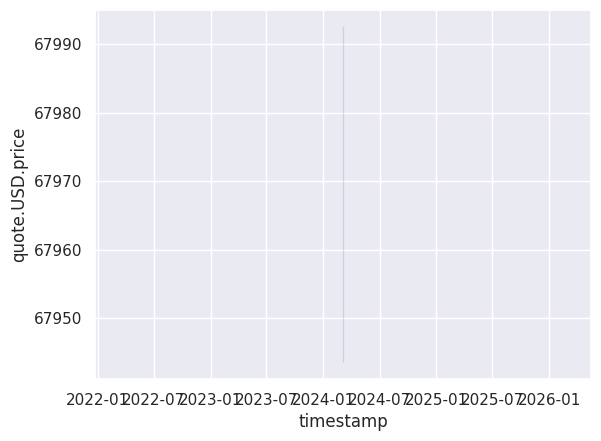

In [41]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)